# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [1403]:
#Importing pandas a and the data
import pandas as pd

In [1404]:
recepies=pd.read_csv('recipe_site_traffic_2212.csv')

#looking at the first rows of the data
recepies.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [1405]:
recepies.shape

(947, 8)

There seems to be some missing data as well as types of features 'category', 'servings', 'high_traffic' are denoted as object, so we will look at it more in depth in the next step.

In [1406]:
recepies.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [1407]:
recepies.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [1408]:
recepies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


## Variables

### Recepies

The data has 947 rows and 7 features. Recipe has 947 unique values, it could be used as index, but I prefer to keep is a unique recipe id.

In [1409]:
#recipe
recepies.recipe.nunique()

947

### High Traffic

This is the depenent variable, that we are about to explain with other variables.
I.e. if it generated a high traffic. As we see below there is a lot of missing values in the column.
Looking closer, the 'missing values' most likely mean that the traffic was not high (i.e. most likely only the recepies with high traffic were marked).

I will therefore change the type of the variable to boolean/integer (1: High Traffic, 0: NOT High Traffic)


In [1410]:
recepies['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [1411]:
recepies['high_traffic'].isna().sum()

373

In [1412]:
recepies['high_traffic'].value_counts() + recepies['high_traffic'].isna().sum()

High    947
Name: high_traffic, dtype: int64

In [1413]:
#filling missing values with 0
recepies['high_traffic']=recepies['high_traffic'].fillna(0)

In [1414]:
#making a new column to be used for generating graphics
recepies['high_traffic_cat']=recepies['high_traffic']
recepies['high_traffic_cat']=recepies['high_traffic'].replace(0,'NOT High')

In [1415]:
#replacing high with 1 in the high_traffic column
recepies['high_traffic']=recepies['high_traffic'].replace('High',1)

In [1416]:
#recepies['high_traffic']=recepies['high_traffic'].astype('bool')
# I've decided not to convert to boolean as it does not work with boxplots in seaborn
# Also 1, 0 is more intuitive for the regressions

THe product manager noticed that 40% of published recepies result in high traffic. However, the data suggests that **over 60% of the recepies do have high traffic**

In [1417]:
recepies['high_traffic'].mean()*100

60.61246040126716

### Servings

String "as a snack" has crept into othervise numerical variable. I will remove the comment (replace) from servings and make sure that the recepies are under the correct category 'Lunch/Snacks' (which they are)

In [1418]:
recepies.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [1419]:
recepies[(recepies.servings=='4 as a snack') | (recepies.servings=='6 as a snack')]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,1,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,1,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,0,NOT High


In [1420]:
recepies['servings']=recepies.servings.replace(['4 as a snack','6 as a snack'], [4, 6])

Now,change the datatype of servings to integer

In [1421]:
recepies['servings']=recepies['servings'].astype('int64')

### Category

- There are various categories for the recepies. 
- They are a bit inconsistent as they both constities ingredients (Chicken, Chicken Breast, Potato, etc.) and meal types (Breakfast, Dessert, etc.). But Let us leave this issue asside for now and keep the categories as they are

In [1422]:
recepies.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [1423]:
recepies['category']=recepies.category.astype('category')

### Calories, carbohydrate, sugar,protein

In [1424]:
recepies.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic', 'high_traffic_cat'],
      dtype='object')

- For the remaining variables, it looks like they are missing values in the same rows. 
- There are 52 of them, around 5.5% of the obervations.
- So for now I will drop the missing values.

In [1425]:
52/947

0.054910242872228086

In [1426]:
recepies[recepies.calories.isnull()].count()

recipe              52
calories             0
carbohydrate         0
sugar                0
protein              0
category            52
servings            52
high_traffic        52
high_traffic_cat    52
dtype: int64

In [1427]:
recepies[recepies.calories.isnull()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat
0,1,NaN,NaN,NaN,NaN,Pork,6,1,High
23,24,NaN,NaN,NaN,NaN,Meat,2,0,NOT High
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,0,NOT High
82,83,NaN,NaN,NaN,NaN,Meat,4,1,High
89,90,NaN,NaN,NaN,NaN,Pork,6,1,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,1,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,1,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,1,High
149,150,NaN,NaN,NaN,NaN,Potato,2,1,High
187,188,NaN,NaN,NaN,NaN,Pork,4,1,High


In [1428]:
df=recepies.dropna()

And a quick check
Also renaming the final DataFrame

In [1429]:
df.isna().sum()

recipe              0
calories            0
carbohydrate        0
sugar               0
protein             0
category            0
servings            0
high_traffic        0
high_traffic_cat    0
dtype: int64

In [1430]:
df.shape

(895, 9)

### Duplicates

Seems like there are no duplicates

In [1431]:
df[df.duplicated()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat


df.duplicates()

# EDA

In [1432]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Comment: I am not sure if using 'hue' in the seaborn graphs counts as one or two variables.

## Functions

In [1433]:
def boxplot_show(feature,df=df):    

    fig, plt.subplots(figsize=(5,1))

#Seaborn Boxplot
    sns.boxplot(data=df, x=feature)
#Adding title with capitalisation of the feature name
    plt.title(f'{feature.capitalize()} Boxplot')
    plt.show()

In [1434]:
def boxplot_split_show(feature,df=df):    

    fig, plt.subplots(figsize=(5,2))

#Seaborn Boxplot
    sns.boxplot(data=df, x=feature, y='high_traffic_cat')
    
#Adding title with capitalisation of the feature name
    plt.title(f'{feature.capitalize()} Boxplot by Traffic')
    
    
# Title y
    plt.ylabel('Traffic')    
    
#showing the graph    
    plt.show()

In [1435]:
#Creating a function to loop through columns and make diagrams for a variable
def dist_show(feature,df=df):

    fig, ax=plt.subplots(figsize=(7,4))

#Drawing a histogram 
    sns.histplot(data=df,
                x=feature,
                hue='high_traffic',
                kde=True,
                fill=True,
                ax=ax, 
                alpha=0.5)
   
#Rotating the xlabels to make them more visible (no overlapping)
    plt.xticks(rotation=45)
    
#Adding title with capitalisation of the feature name
    plt.title(f'{feature.capitalize()} distribution for High Traffic (1) and NOT High Traffic (0) Recipes')
    plt.show()

In [1436]:
def countplot_show(feature,df=df):  
    
    fig, ax=plt.subplots(figsize=(10,3))

    sns.countplot(data=df, x=feature, ax=ax)
    
    #Rotating the xlabels to make them more visible (no overlapping)
    plt.xticks(rotation=45)
    
    plt.title(f'{feature.capitalize()} Count')
    plt.show()

In [1437]:
#Violin plot

def violinplot_show(feature,df=df):
    fig, ax=plt.subplots(figsize=(5,1))
    sns.violinplot(data=df, x=feature, ax=ax)
    plt.title(f'{feature.capitalize()} Violin Plot')
    plt.show()

In [1438]:
def violinplot_split_show(feature,df=df):
    fig, ax=plt.subplots(figsize=(5,3))
    sns.violinplot(data=df, x=feature, y="high_traffic_cat", ax=ax)
    plt.title(f'{feature.capitalize()} Violin Plot by Traffinc')
    
    
# Title y
    plt.ylabel('Traffic')
    
#showing the graph    
    plt.show()

In [1439]:
def all_graps(feature,df):
    boxplot_show(feature,df=df)
    print('\n------------------------------------------------------------------------------\n')
    boxplot_split_show(feature,df=df)
    print('\n------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------\n')
    violinplot_show(feature,df=df)
    print('\n------------------------------------------------------------------------------\n')
    violinplot_split_show(feature,df=df)
    print('\n------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------\n')
    dist_show(feature,df=df)

## High Traffic

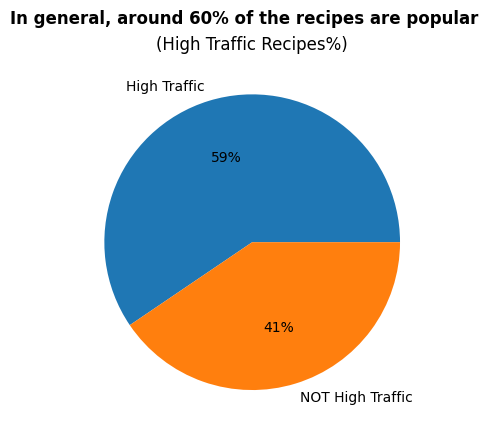

In [1482]:
#Creating an np array with the number of high_traffic recepies and low traffic recepies
y = np.array([len(df[df['high_traffic']==1]), len(df[df['high_traffic']==0])])

#Creating an np array with the number of high_traffic recepies and low traffic recepies
plt.pie(y, labels=["High Traffic", "NOT High Traffic"], autopct='%.0f%%') 

#Adding Title and suptitle
plt.suptitle('In general, around 60% of the recipes are popular', weight='bold') 
plt.title('(High Traffic Recipes%)')

plt.show()

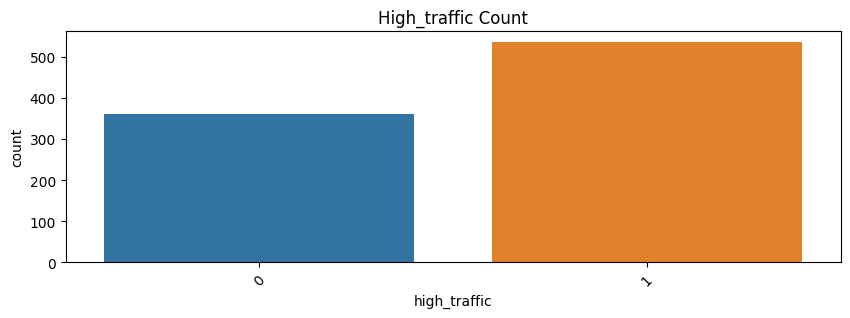

In [1441]:
countplot_show('high_traffic')

## Recipe

Since recipe numbers are id numbers between 1 and 947 (excluding dropped recepies), the plots below only confirm the data and do not bring any additional value for this variable in particular

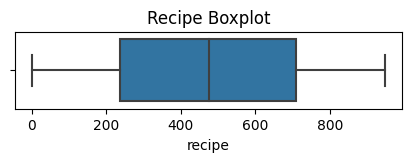


------------------------------------------------------------------------------



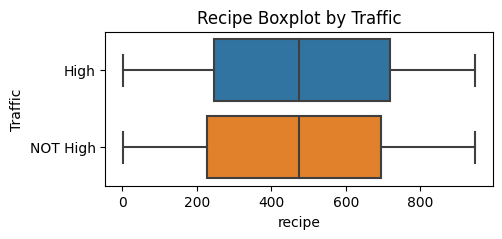


------------------------------------------------------------------------------
------------------------------------------------------------------------------



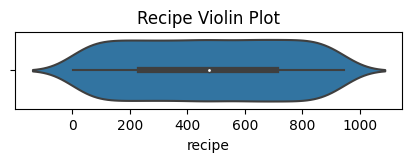


------------------------------------------------------------------------------



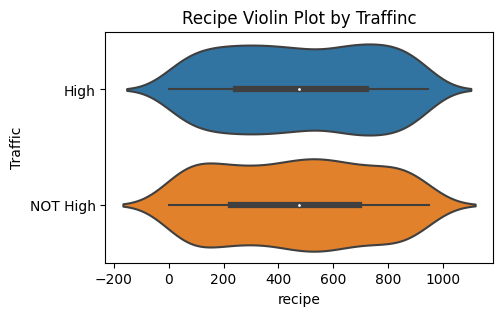

In [1442]:
for feature in ['recipe']:
    boxplot_show(feature)
    print('\n------------------------------------------------------------------------------\n')
    boxplot_split_show(feature)
    print('\n------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------\n')
    violinplot_show(feature)
    print('\n------------------------------------------------------------------------------\n')
    violinplot_split_show(feature)

## Calories         

- Plotting a boxplot of the dist of calories, reveals that there could be come some outliers.
- It is unlikely that one mean would contain over 2000 calories, a daily requirement for one person.
- All recipes with calories above 2000 will be dropped 

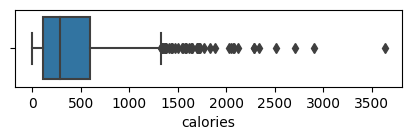

In [1443]:
fig, plt.subplots(figsize=(5,1))

#Seaborn Boxplot
sns.boxplot(data=df, x='calories')
#Adding title with capitalisation of the feature name
plt.show()

In [1444]:
df=df[df['calories']<2000]

- Distributions of calories for are high / NOT high traffic are roughly similiar
- Higher calory recipes lean towards more popular
- Median calories for recepies with less high traffic is around 250, while for more popular closer to 300

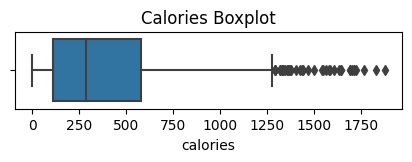


------------------------------------------------------------------------------



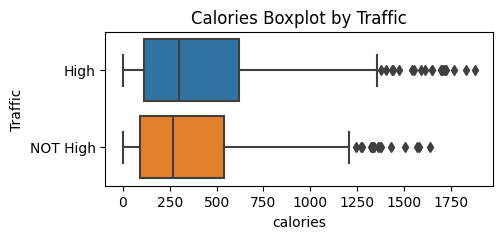


------------------------------------------------------------------------------
------------------------------------------------------------------------------



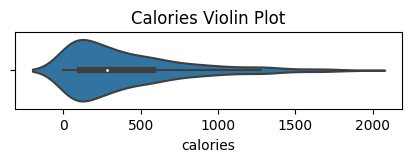


------------------------------------------------------------------------------



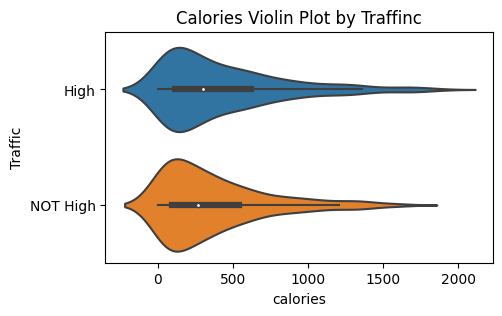


------------------------------------------------------------------------------
------------------------------------------------------------------------------



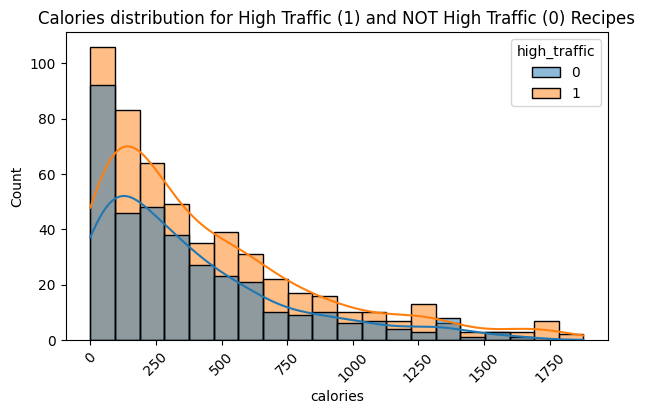

In [1445]:
all_graps('calories', df)

## Carbohydrate     

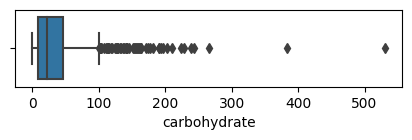

In [1446]:
fig, plt.subplots(figsize=(5,1))

#Seaborn Boxplot
sns.boxplot(data=df, x='carbohydrate')
#Adding title with capitalisation of the feature name
plt.show()

- For carbohydrates seems also like we have two outliers
- Will remove them from the data, carbohydrates over 350

In [1447]:
df=df[df['carbohydrate']<350]

- Similarly to categories, the more carbohydrates to more popular recipe
- Important to remember that there is more high traffic recepies in the sample

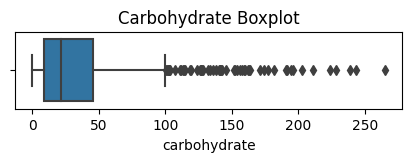


------------------------------------------------------------------------------



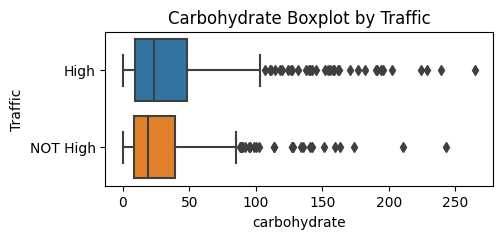


------------------------------------------------------------------------------
------------------------------------------------------------------------------



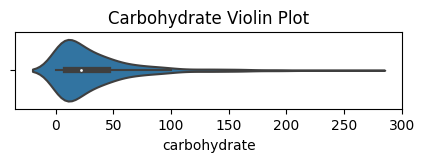


------------------------------------------------------------------------------



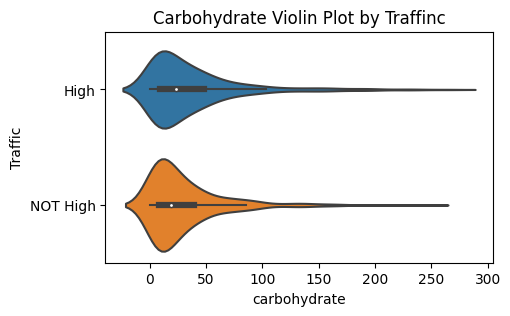


------------------------------------------------------------------------------
------------------------------------------------------------------------------



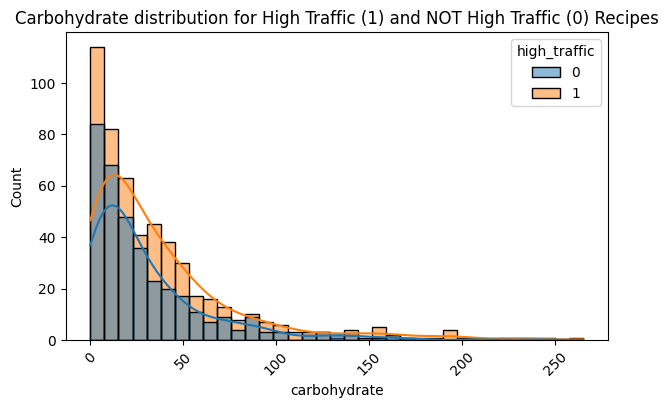

In [1448]:
all_graps('carbohydrate', df)

## Sugar

- Recipes with less sugar generate more traffic

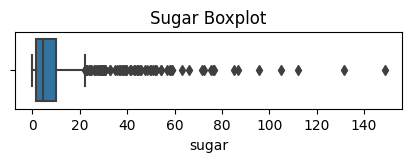


------------------------------------------------------------------------------



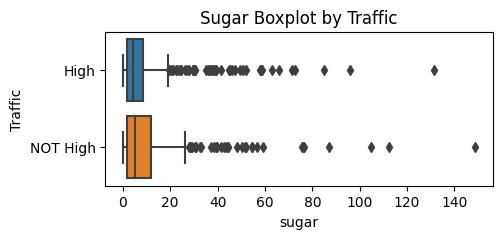


------------------------------------------------------------------------------
------------------------------------------------------------------------------



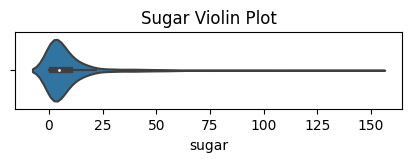


------------------------------------------------------------------------------



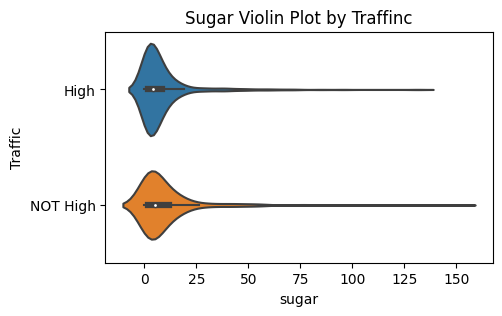


------------------------------------------------------------------------------
------------------------------------------------------------------------------



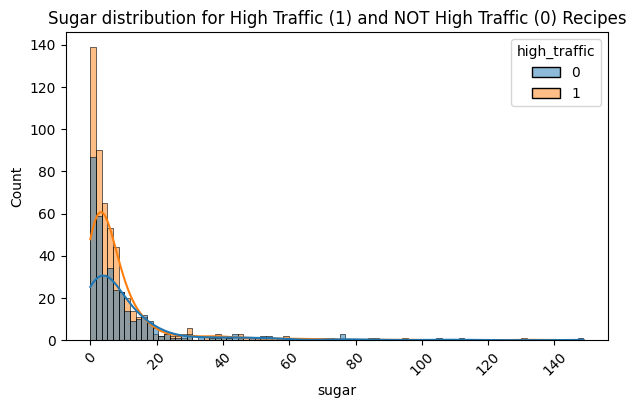

In [1449]:
all_graps('sugar',df)

## Protein

- Will not remove outliers as they seem reasonable, f.eg. 350g chicken per person is not unheard of
- Here again, slightly more traffic towards more protein intense food
- But the traffic is not as high if a recipe contains less protein

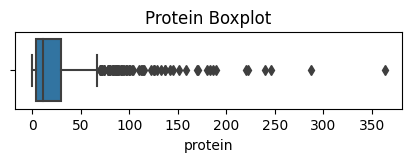


------------------------------------------------------------------------------



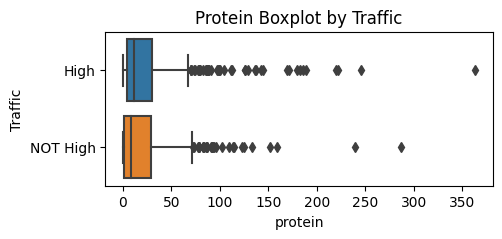


------------------------------------------------------------------------------
------------------------------------------------------------------------------



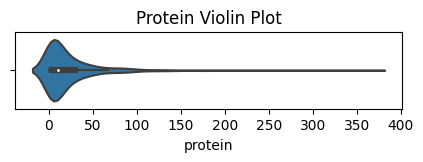


------------------------------------------------------------------------------



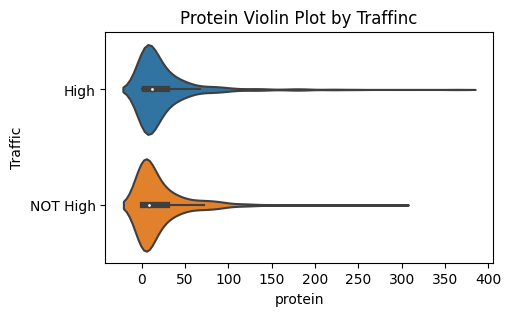


------------------------------------------------------------------------------
------------------------------------------------------------------------------



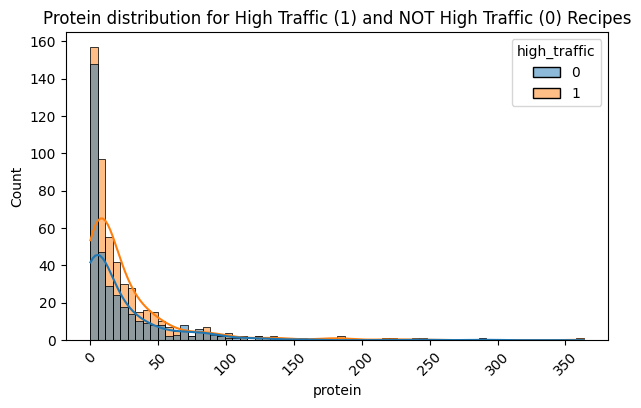

In [1450]:
all_graps('protein', df)

## Category        

- At the first glance, Catagory of the recipe seems to be the most important factor. Where beverages are the least popular (in terms of number of recipes and potato are the most)
- For the other features, the difference in distibution between high_traffic and low_traffic seems to be less dramatic

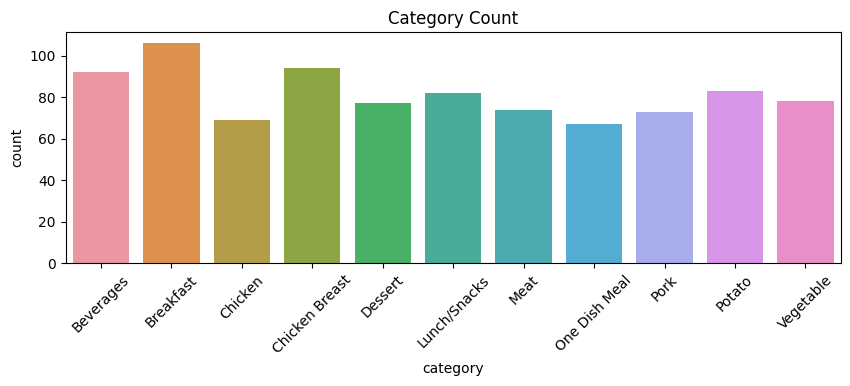

In [1451]:
countplot_show('category')

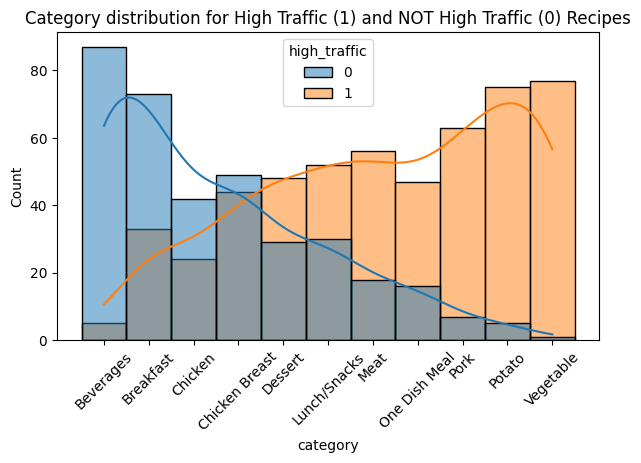

In [1452]:
dist_show('category',df=df)

In [1453]:
#importing the package
from sklearn.preprocessing import OneHotEncoder

In [1454]:
df.category.unique()

['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken Breast', ..., 'Pork', 'Chicken', 'Vegetable', 'Meat', 'Dessert']
Length: 11
Categories (11, object): ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']

In [1455]:
#creatinga dataframe with only 'categories to encode'. It will be the base for OneHotEncoder
df_cat=pd.DataFrame(df['category'])

In [1456]:
#initialising
enc=OneHotEncoder()

#fitting and transforing into an array with 0-1
encoding=enc.fit_transform(df_cat)
array_hot_encoded=encoding.toarray()
array_hot_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [1457]:
#checking categories
enc.categories_

[array(['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', 'Dessert',
        'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
        'Vegetable'], dtype=object)]

In [1458]:
#Creating labels for the dataframe.
labels_df=[i for mini_list in enc.categories_ for i in mini_list]

In [1459]:
#Adding the column names
data_hot_encoded = pd.DataFrame(array_hot_encoded, columns=labels_df)
data_hot_encoded

,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
876,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1460]:
#Merging with the original df
data_end=pd.merge(df,data_hot_encoded, left_index=True, right_index=True)

#final check that the merge went well
print(df.shape, data_hot_encoded.shape, data_end.shape)

(881, 9) (881, 11) (825, 20)


In [1461]:
data_end

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
1,2,35.48,38.56,0.66,0.92,Potato,4,1,High,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0,NOT High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,27.05,1.85,0.80,0.53,Beverages,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1,High,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,25.21,0.47,20.64,52.56,Pork,2,1,High,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,878,70.25,28.84,4.54,3.96,Breakfast,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
878,879,88.26,18.58,5.21,99.64,Meat,6,1,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879,880,190.33,22.62,0.51,11.92,Meat,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Servings

- Distributions suggest that there is no apparent difference between recipes for small or large groups of people

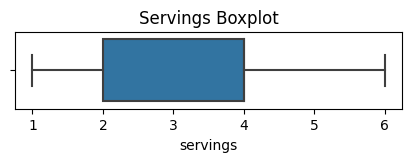


------------------------------------------------------------------------------



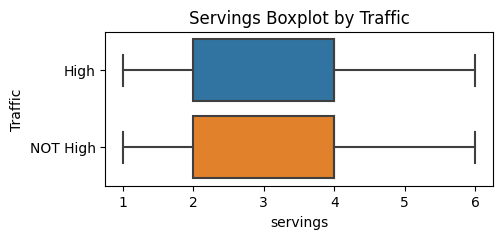


------------------------------------------------------------------------------
------------------------------------------------------------------------------



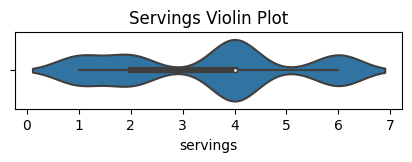


------------------------------------------------------------------------------



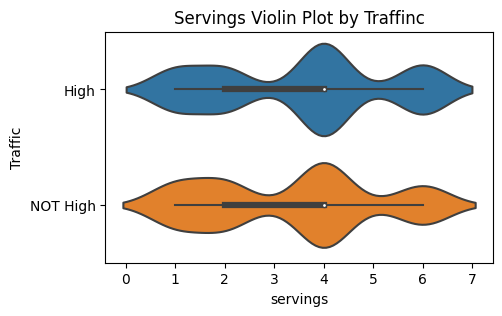


------------------------------------------------------------------------------
------------------------------------------------------------------------------



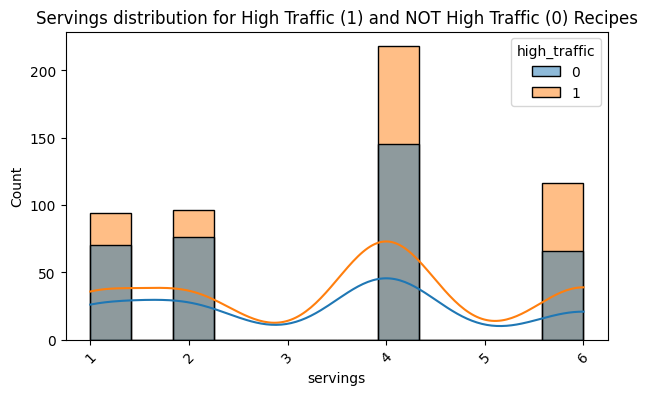

In [1462]:
all_graps('servings', df)

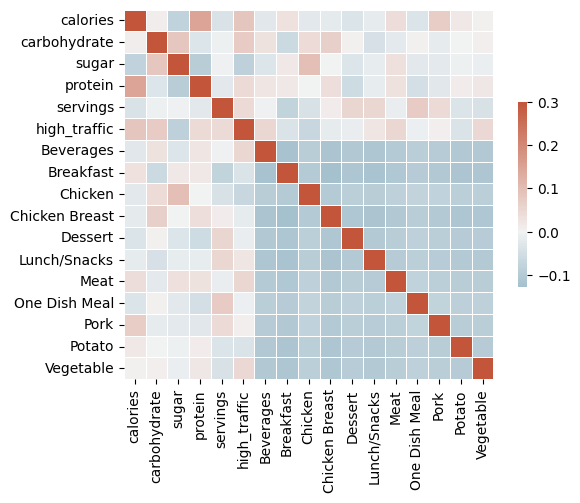

In [1480]:
corr=data_end.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

- No very strong correlation between high traffic and any single variable
- Was expecting something different, given the histogram by traffic for recipe category
- Comment: encoded categories have a suspisiously uniform color
- The most correlatio between high_traffic is seen with calories, carbohydrates, sugar, lunch/snack

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Fitting models

- It is a classification model
- Where we have two classes: 1 - high_traffic amd 0- NOT high_traffic, see column hightraffic

In [1464]:
data_end

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_cat,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
1,2,35.48,38.56,0.66,0.92,Potato,4,1,High,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0,NOT High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,27.05,1.85,0.80,0.53,Beverages,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1,High,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,25.21,0.47,20.64,52.56,Pork,2,1,High,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,878,70.25,28.84,4.54,3.96,Breakfast,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
878,879,88.26,18.58,5.21,99.64,Meat,6,1,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879,880,190.33,22.62,0.51,11.92,Meat,4,0,NOT High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1465]:
#dropping columns that will not be used for models
data_end = data_end.drop(columns=['category','high_traffic_cat','recipe'])
data_end

,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
1,35.48,38.56,0.66,0.92,4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,914.28,42.68,3.09,2.88,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,97.03,30.56,38.63,0.02,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.05,1.85,0.80,0.53,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,691.15,3.46,1.65,53.93,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,25.21,0.47,20.64,52.56,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,70.25,28.84,4.54,3.96,4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
878,88.26,18.58,5.21,99.64,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879,190.33,22.62,0.51,11.92,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1466]:
data_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 1 to 880
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   calories        825 non-null    float64
 1   carbohydrate    825 non-null    float64
 2   sugar           825 non-null    float64
 3   protein         825 non-null    float64
 4   servings        825 non-null    int64  
 5   high_traffic    825 non-null    int64  
 6   Beverages       825 non-null    float64
 7   Breakfast       825 non-null    float64
 8   Chicken         825 non-null    float64
 9   Chicken Breast  825 non-null    float64
 10  Dessert         825 non-null    float64
 11  Lunch/Snacks    825 non-null    float64
 12  Meat            825 non-null    float64
 13  One Dish Meal   825 non-null    float64
 14  Pork            825 non-null    float64
 15  Potato          825 non-null    float64
 16  Vegetable       825 non-null    float64
dtypes: float64(15), int64(2)
memory usa

In [1467]:
X=data_end.drop(labels='high_traffic', axis=1).values
y=data_end[['high_traffic']].values.reshape(-1,)

In [1468]:
# The training set here is in fact a validation set, since the test file is saved separately
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify=y) #since the set is not balanced, startify to make attrition distribute evenly

In [1469]:
#Since the variable have different ranges, I will apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

## Logistic Regression

In [1470]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [1471]:
#adding cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#setting up paarameters for grid_search
param_grid = {
    "pf__degree": [1, 2, 3],
    "lr__C": [0.001, 0.01, 0.1, 10]
}

#creating a pipeline for both polynomial regression and Logistic regression
pipe = Pipeline([('pf', PolynomialFeatures()),
                 ('lr', LogisticRegression())])

gs = GridSearchCV(pipe, param_grid, cv=kf, verbose=3) #adding verbose to see what is going on

#fitting
gs.fit(X_train_std, y_train)

#predicting
y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .........lr__C=0.001, pf__degree=1;, score=0.591 total time=   0.0s
[CV 2/5] END .........lr__C=0.001, pf__degree=1;, score=0.583 total time=   0.0s
[CV 3/5] END .........lr__C=0.001, pf__degree=1;, score=0.606 total time=   0.0s
[CV 4/5] END .........lr__C=0.001, pf__degree=1;, score=0.614 total time=   0.0s
[CV 5/5] END .........lr__C=0.001, pf__degree=1;, score=0.576 total time=   0.0s
[CV 1/5] END .........lr__C=0.001, pf__degree=2;, score=0.598 total time=   0.0s
[CV 2/5] END .........lr__C=0.001, pf__degree=2;, score=0.591 total time=   0.1s
[CV 3/5] END .........lr__C=0.001, pf__degree=2;, score=0.614 total time=   0.1s
[CV 4/5] END .........lr__C=0.001, pf__degree=2;, score=0.621 total time=   0.1s
[CV 5/5] END .........lr__C=0.001, pf__degree=2;, score=0.583 total time=   0.1s
[CV 1/5] END .........lr__C=0.001, pf__degree=3;, score=0.561 total time=   0.4s
[CV 2/5] END .........lr__C=0.001, pf__degree=3;

In [1472]:
#Best model
print(gs.best_params_)

{'lr__C': 0.01, 'pf__degree': 1}


In [1473]:
from sklearn.metrics import classification_report
#adding classification report
print('TRAINING SET')
print(classification_report(y_train, y_train_pred))
print('------------------\n')
print('TEST SET')
print(classification_report(y_test, y_test_pred))

TRAINING SET
              precision    recall  f1-score   support

           0       0.62      0.09      0.16       268
           1       0.61      0.96      0.74       392

    accuracy                           0.61       660
   macro avg       0.61      0.53      0.45       660
weighted avg       0.61      0.61      0.51       660

------------------

TEST SET
              precision    recall  f1-score   support

           0       0.69      0.13      0.23        67
           1       0.62      0.96      0.75        98

    accuracy                           0.62       165
   macro avg       0.66      0.55      0.49       165
weighted avg       0.65      0.62      0.54       165



- The results are quite poor for the training set. I print out results for the test set as well.
- But with accuracy of ~60% on the training set, the model is 10% more accurate than guessing.

- Confusion Matix also suggests that the model is geared towards guessing that everything high traffic 
- Predicted labels are on the x axis, and true on the y axis
- See the number of false positives in both training and test sets
- One reason for this is that we have more high traffic recipes in the sample
- One of the solutions could be to make the sample more balanced, for instance buy dropping some high traffic recipes 
- Stratification did not help

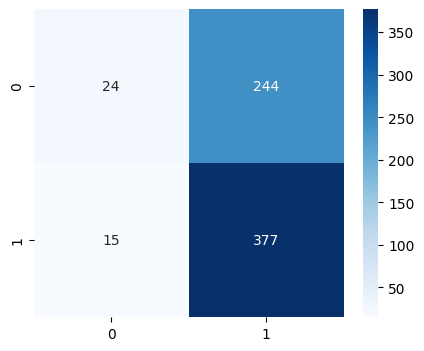

In [1474]:
plt.figure(figsize=(5,4))
cm=confusion_matrix_show(y_train, y_train_pred)

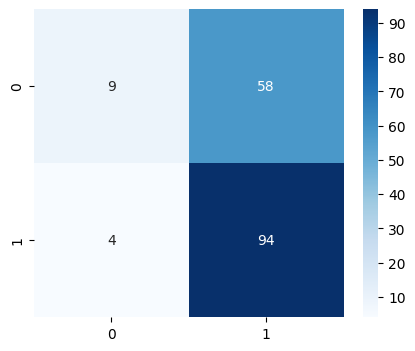

In [1475]:
plt.figure(figsize=(5,4))
cm=confusion_matrix_show(y_test, y_test_pred)

## K nearest neighbours 

In [1476]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": [3,5,7,9,11]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn=KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv=kf)
gs.fit(X_train_std, y_train)

# Prediction
y_train_pred = gs.predict(X_train_std)
y_test_pred = gs.predict(X_test_std)

In [1477]:
gs.best_params_

{'n_neighbors': 7}

- KNN Model performs better than Log regression
- But it overfits the training data
- on the test data the results are close to guessing around 54% on accuracy

In [1478]:
#adding classification report
print('TRAINING SET')
print(classification_report(y_train, y_train_pred))
print('------------------\n')
print('TEST SET')
print(classification_report(y_test, y_test_pred))

TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       268
           1       0.72      0.83      0.77       392

    accuracy                           0.71       660
   macro avg       0.71      0.68      0.69       660
weighted avg       0.71      0.71      0.70       660

------------------

TEST SET
              precision    recall  f1-score   support

           0       0.46      0.40      0.43        67
           1       0.62      0.67      0.65        98

    accuracy                           0.56       165
   macro avg       0.54      0.54      0.54       165
weighted avg       0.56      0.56      0.56       165



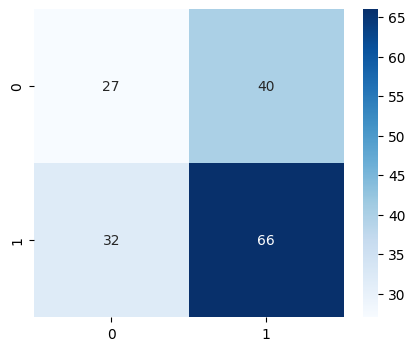

In [1479]:
plt.figure(figsize=(5,4))
cm=confusion_matrix_show(y_test, y_test_pred)